<a href="https://colab.research.google.com/github/Vysakh-T/B.Tech-KTU-/blob/master/Copy_of_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import urllib.request
import numpy as np

# Download the data and load it into a Pandas data frame.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
dataset  = pd.read_csv(response, header=None)

# Set the column names.
names = ['A', 'B', 'C', 'D', 'class']
data.columns = names

# Tells pandas that this is a categorical feature.
data['class'] = pd.Categorical(data['class']) 
print("Data shape: ", data.shape)
data.head(100) # Prints first 5 examples from the data set.

Data shape:  (150, 5)


,A,B,C,D,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [0]:
# prepare data
X = np.array(dataset.iloc[:,:])
Y = dataset['class']
S = 0.67
split = np.random.rand(len(X))<S
train = X[split]
test = X[~split]
testlabel = Y[~split]
print ('Train set: ' + repr(len(train)))
print ('Test set: ' + repr(len(test)))

Train set: 103
Test set: 47


(4.1092489630922815, 8.108639158574627, 1.845406031168224, 4.536101237031515)

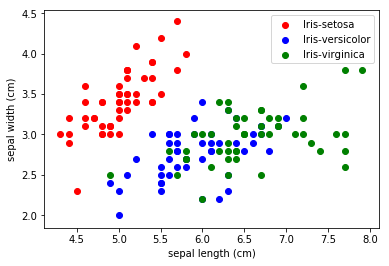

In [0]:
import matplotlib.pyplot as plt
# Plot the points in the first two dimensions.
plt.scatter(X[Y=='Iris-setosa', 0], X[Y=='Iris-setosa', 1], color='red', label='Iris-setosa')
plt.scatter(X[Y=='Iris-versicolor', 0], X[Y=='Iris-versicolor', 1], color='blue', label='Iris-versicolor')
plt.scatter(X[Y=='Iris-virginica', 0], X[Y=='Iris-virginica', 1], color='green', label='Iris-virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [0]:
import operator
def euclidean(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return np.sqrt(distance)

In [0]:
def getknn(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclidean(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [0]:
 
def getResponse(neighbors):
	group = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in group:
			group[response] += 1
		else:
			group[response] = 1
	sortedgroup = sorted(group.items(), key=operator.itemgetter(1), reverse=True)
	return sortedgroup[0][0]

In [0]:
 
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [0]:
def main():
	# generate predictions
	predictions=[]
	k = 2
	for x in range(len(test)):
		neighbors = getknn(train, test[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		print('> predicted=' + repr(result) + ', actual=' + repr(test[x][-1]))
	accuracy = getAccuracy(test, predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	
main()


> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', a

In [0]:
accuracyList = []
predictions = []
k_range = (1,30)
for k in k_range:
  for x in range(len(test)):
    neighbors = getknn(train, test[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
  accuracy = getAccuracy(test, predictions)
  accuracyList.append(accuracy)
#Plot Best K graph
import matplotlib.pyplot as plt
plt.plot(k_range,accuracyList)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("A plot of Accuracy vs value of K")

